# Unsupervised learning - K-Means


## Diabetes dataset

The dataset is part of a large dataset maintained at the National Institute of Diabetes and Digestive and Kidney Diseases in the United States. It is used for a diabetes study conducted on Pima Indian women aged 21 and over living in Phoenix, the fifth largest city in the state of Arizona, USA. The dataset consists of 768 observations and 8 numerical independent variables. The target variable is indicated as "outcome"; 1 represents a positive diabetes test result, and 0 represents a negative result.

In [3]:
## Importing Libraries 

# Base libraries
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.cluster import KMeans

# Visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Default options 
# Set 4 decimal points to float type
pd.set_option("display.float_format", lambda x: "%.4f" % x)




## Loading the data

### Variables 

- Pregnancies: Number of pregnancies
- Glucose: Glucose level
- BloodPressure: Blood pressure
- SkinThickness: Skin thickness
- Insulin: Insulin level
- BMI: Body mass index
- DiabetesPedigreeFunction: A function that calculates the likelihood of having diabetes based on our family members.
- Age: Age (years)
- Outcome: Information about whether the individual has diabetes or not. Affected by the disease (1) or not (0)

In [4]:
# Set the data path 
DATA_PATH="../data/diabetes/"
DATA_FILE="diabetes.csv"
print(os.listdir(DATA_PATH))

# read the datafile
df = pd.read_csv(DATA_PATH + DATA_FILE)

# Data dimension 
print("Dataset:",df.shape[0],"rows,",  df.shape[1], "columns")

df.head()

['README.md', 'diabetes.csv']
Dataset: 768 rows, 9 columns


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1


## K-means (clustering)

In [11]:
# Splitting input and output
X = df.drop(columns="Outcome")
y = df.Outcome
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [9]:
kmeans = KMeans(n_clusters=2)
clustering = kmeans.fit(X)

In [15]:
#print(y)
#clustering.cluster_centers_
#print(clustering.labels_)
#X['clusters'] = clustering.labels_
#X.head()

metrics.accuracy_score(y, clustering.labels_)
#metrics.confusion_matrix(y, clustering.labels_)
print(metrics.classification_report(y,clustering.labels_))



              precision    recall  f1-score   support

           0       0.70      0.84      0.76       500
           1       0.52      0.32      0.40       268

    accuracy                           0.66       768
   macro avg       0.61      0.58      0.58       768
weighted avg       0.64      0.66      0.64       768



## Number of clusters 

### Elbow method

Elbow method: finds optimal cluster count by identifying the point where adding clusters offers diminishing returns in reducing within-cluster sum of squares.

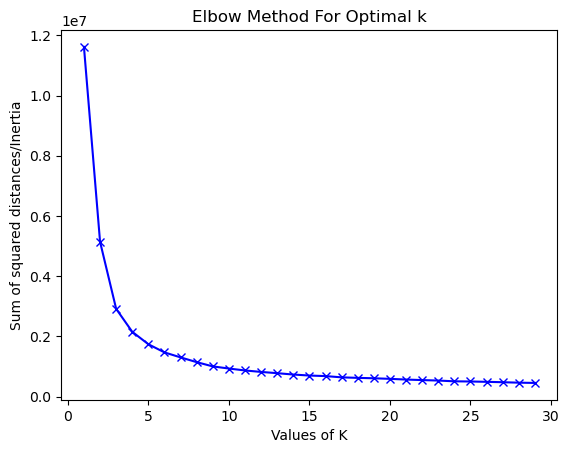

In [16]:
Sum_of_squared_distances = []
K = range(1,30)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

### Silhouette analysis

Silhouette analysis: assesses clustering quality by measuring the cohesion and separation of clusters, helping determine the optimal number of clusters (k) in a clustering algorithm.

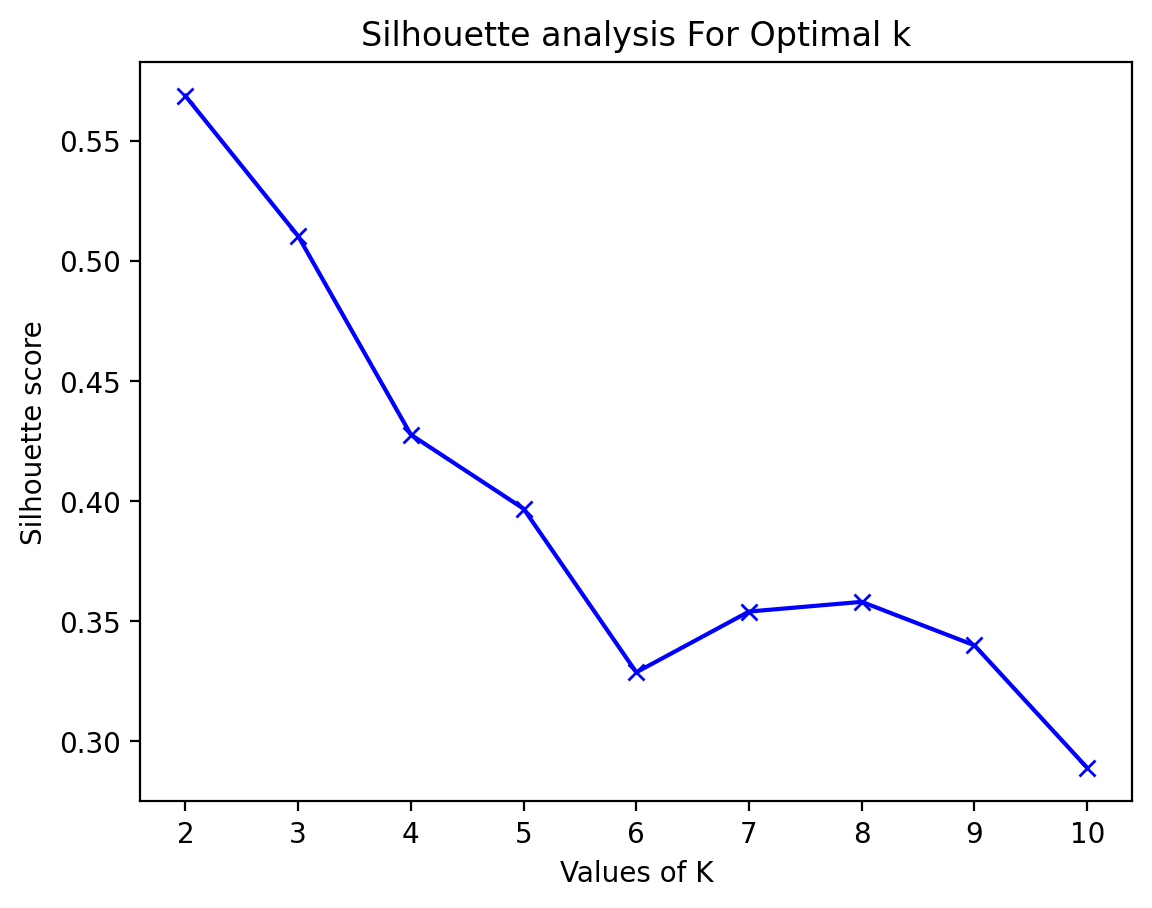

In [40]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_ 
    # silhouette score
    silhouette_avg.append(silhouette_score(df, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()